In [4]:
import pandas as pd
import os
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import skew

In [5]:
os.chdir("/Users/andrewyoel/Documents")

In [7]:
df= pd.read_excel("data kedelai skripsi copy.xlsx")

In [8]:
df.head()

,diamater,jumlah buku,bobot 100 biji,jumlah biji,jumlah polong,PB,LB,TB,jumlah cabang,tinggi tanaman
0,4.55,11,25.4,64,24,11.488,7.382,4.926,9,62.000000
1,4.23,10,21.6,28,11,11.196,7.544,4.872,8,61.000000
2,5.73,11,27.7,99,41,12.216,7.238,5.054,7,52.766667
3,4.94,9,28.6,75,30,12.358,7.370,5.196,6,69.700000
4,4.50,9,26.9,35,15,11.972,7.410,5.140,7,52.250000


# EDA

In [9]:
df.shape

(46, 10)

/Users/andrewyoel/anaconda3/lib/python3.7/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='bobot 100 biji', ylabel='Density'>

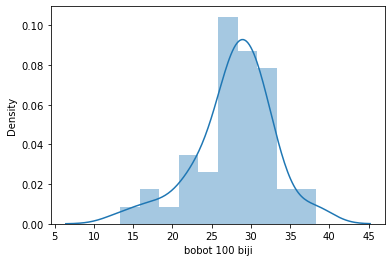

In [10]:
sns.distplot(df['bobot 100 biji'])

In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 46 entries, 0 to 45
Data columns (total 10 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   diamater        46 non-null     float64
 1   jumlah buku     46 non-null     int64  
 2   bobot 100 biji  46 non-null     float64
 3   jumlah biji     46 non-null     int64  
 4   jumlah polong   46 non-null     int64  
 5   PB              46 non-null     float64
 6   LB              46 non-null     float64
 7   TB              46 non-null     float64
 8   jumlah cabang   46 non-null     int64  
 9   tinggi tanaman  46 non-null     float64
dtypes: float64(6), int64(4)
memory usage: 3.7 KB


In [12]:
numeric_feats = df.dtypes[df.dtypes != 'object'].index

<AxesSubplot:>

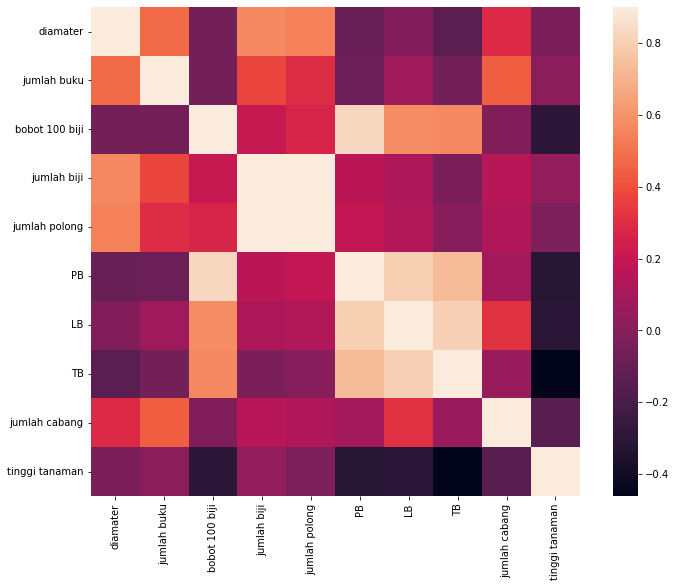

In [13]:
cormat=df[numeric_feats].corr()
plt.subplots(figsize=(12,9))
sns.heatmap(cormat,vmax= 0.9, square= True)

In [14]:
bobot_100_biji= pd.DataFrame({'bobot 100 biji' : df['bobot 100 biji'],'log bobot 100 biji': np.log1p(df['bobot 100 biji'])})

array([[<AxesSubplot:title={'center':'bobot 100 biji'}>,
        <AxesSubplot:title={'center':'log bobot 100 biji'}>]],
      dtype=object)

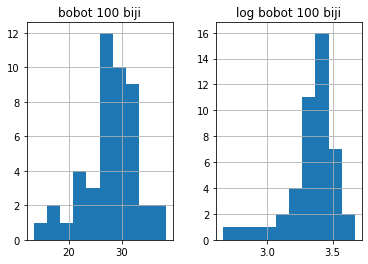

In [15]:
bobot_100_biji.hist()

# MODELLING

In [16]:
df['bobot 100 biji']= np.log1p(df['bobot 100 biji'])

In [17]:
#split feature and target values
X= df.iloc[:, 5:8]
y= df['bobot 100 biji']

In [18]:
from sklearn.linear_model import RidgeCV,LassoCV,LinearRegression
from sklearn.model_selection import cross_val_score

In [19]:
def rmse_cv(model): 
    return np.sqrt(-cross_val_score(model,X,y, scoring= "neg_mean_squared_error", cv =5))

In [20]:
# Model 1 = Linear Regression
model_lr = LinearRegression()
model_lr.fit(X, y)
rmse_cv(model_lr).mean()

0.12572715389976935

In [21]:
# Model 2 = Ridge Regression
model_Rs = RidgeCV(alphas =[1, 0.1, 0.05, 0.01])
rmse_cv(model_Rs).mean()

0.12359873100267546

In [22]:
# Model 3 = Lasso Regression
model_Ls = LassoCV(alphas =[1, 0.1, 0.05, 0.01])
rmse_cv(model_Ls).mean()

0.1133150930882291

# Check Feature Importance

In [23]:
coef = pd.Series(model_Ls.fit(X,y).coef_, index= X.columns)

In [24]:
imp_coef= pd.concat([coef.sort_values().head(10), coef.sort_values().tail(10)])

<AxesSubplot:>

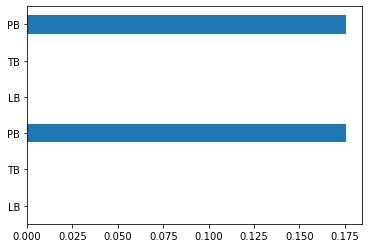

In [25]:
imp_coef.plot(kind='barh')